In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
import os

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
print('X training shape: ', X_train.shape)
print('Y training shape: ', y_train.shape)
print('X testing shape: ', X_test.shape)
print('Y testing shape: ', y_test.shape)

X training shape:  (50000, 32, 32, 3)
Y training shape:  (50000, 1)
X testing shape:  (10000, 32, 32, 3)
Y testing shape:  (10000, 1)


In [4]:
#Converts it to grayscale 
#X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
#X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

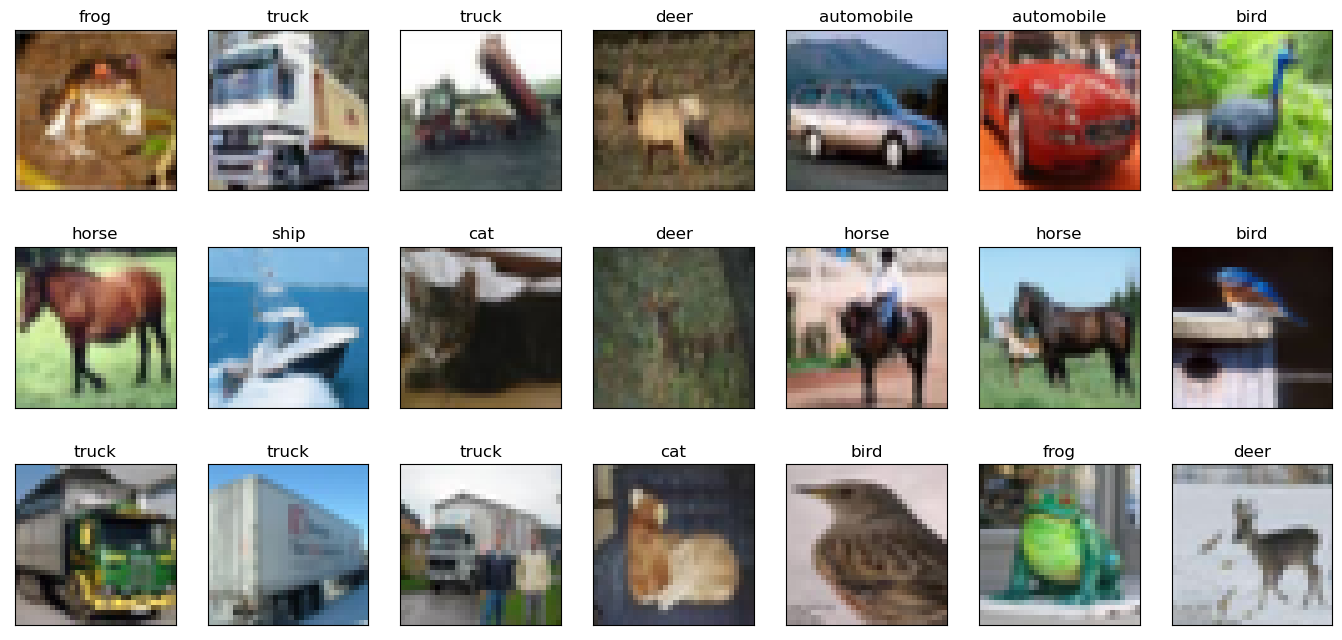

In [6]:
fig,axes = plt.subplots(ncols =7, nrows=3, figsize=(17,8))

index=0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index],cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index+=1
plt.show()

In [7]:
print('X Training shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)

X Training shape:  (50000, 32, 32, 3)
X Test shape:  (10000, 32, 32, 3)


In [8]:
print(y_train[10])

[4]


In [9]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

In [10]:
#One hot encoding
y_train =keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
from keras.layers import Conv2D, MaxPooling2D

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 10)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
X_train = np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)

X train shape: (50000, 32, 32, 3, 1)
X test shape: (10000, 32, 32, 3, 1)


In [16]:
print('Y train shape:', y_train.shape)
print('Y test shape:', y_test.shape)

Y train shape: (50000, 10)
Y test shape: (10000, 10)


In [22]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(128,(3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Adding the dropout function to reduce overfitting
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(64,(3,3), padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64,activation='relu'))

model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [23]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)         

In [24]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [25]:
#this is an overfitting and ergo was not happening earlier!!!

In [26]:
r = model1.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/20
391/391 [==============================] - 123s 305ms/step - loss: 1.9057 - accuracy: 0.3008 - val_loss: 1.5691 - val_accuracy: 0.4423
Epoch 2/20
391/391 [==============================] - 116s 298ms/step - loss: 1.5280 - accuracy: 0.4461 - val_loss: 1.3343 - val_accuracy: 0.5207
Epoch 3/20
391/391 [==============================] - 112s 287ms/step - loss: 1.3702 - accuracy: 0.5086 - val_loss: 1.2283 - val_accuracy: 0.5744
Epoch 4/20
391/391 [==============================] - 114s 290ms/step - loss: 1.2641 - accuracy: 0.5492 - val_loss: 1.1700 - val_accuracy: 0.5952
Epoch 5/20
391/391 [==============================] - 112s 287ms/step - loss: 1.1842 - accuracy: 0.5806 - val_loss: 1.0764 - val_accuracy: 0.6272
Epoch 6/20
391/391 [==============================] - 112s 287ms/step - loss: 1.1190 - accuracy: 0.6040 - val_loss: 1.0265 - val_accuracy: 0.6402
Epoch 7/20
391/391 [==============================] - 122s 313ms/step - loss: 1.0723 - accuracy: 0.6216 - val_loss: 1.0239 -

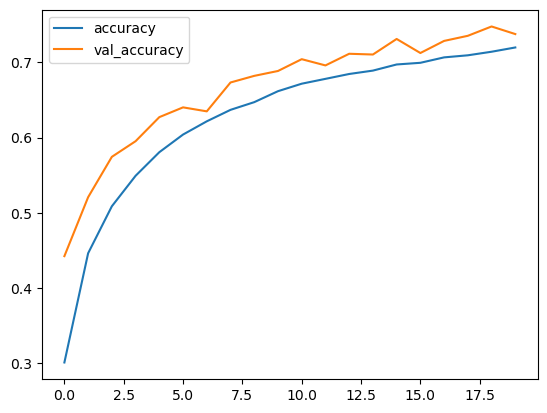

In [27]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

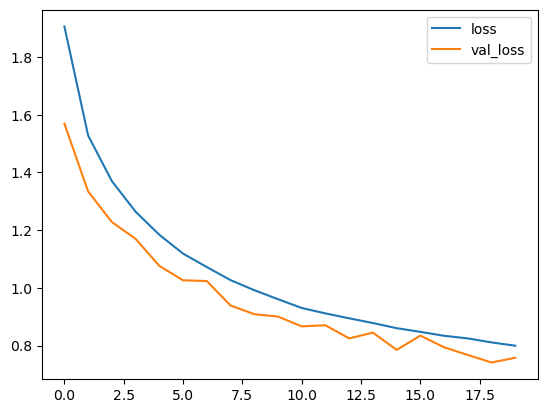

In [28]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()

In [30]:
Y_pred = model1.predict(X_test)
#convert prediction classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
#convert testing observations to one hot vectors
Y_true= np.argmax(y_test, axis =1)
#compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 6s 18ms/step


In [31]:
print(confusion_mtx)

tf.Tensor(
[[804   8  65   8  18   2   6  12  66  11]
 [ 28 895   5   4   2   6  10   3  23  24]
 [ 60   5 695  29  90  38  46  31   5   1]
 [ 31   8 118 459  83 158  79  49  11   4]
 [ 21   0 105  35 727  14  29  60   9   0]
 [ 21   4  94 125  49 636  21  47   0   3]
 [  5   1  69  32  54  16 809   6   8   0]
 [ 14   4  65  27  72  33   3 782   0   0]
 [ 73  23  22   7   8   4   3   6 851   3]
 [ 54 113  15  14   6   6   8  24  41 719]], shape=(10, 10), dtype=int32)


<AxesSubplot:>

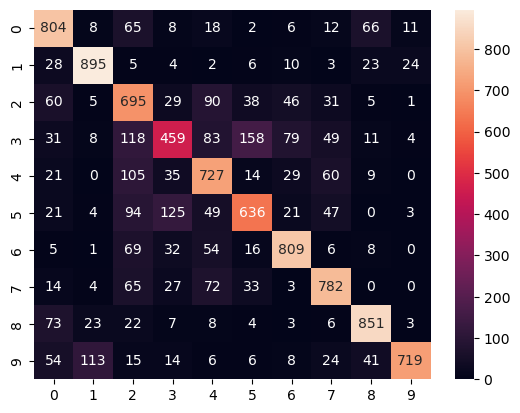

In [32]:
sns.heatmap(confusion_mtx, annot=True, fmt ='g')